<hr style="border-top: 5px solid black;">

<div class="alert alert-block alert-info" style="font-size:16px; border:1px solid black; padding:10px">
<center><h1><br><font color="blue">Simple Linear Regression in R.</font></h1></center>
    <ol>
        <li><a href="#objective1">Introduction to Simple Linear Regression.</a></li><br>
        <li><a href="#objective2">Assumptions for a Simple Linear Regression.</a></li><br>
        <li><a href="#objective3">Estimating and Interpreting Parameters.</a></li><br>
<!--         <li><a href="#objective4"></a></li><br> -->
    </ol>
</div>

<hr style="border-top: 5px solid black;">

<div id="objective1" class="alert alert-block alert-warning" style="font-size:16px; border:1px solid black; padding:10px"><center><h1><br><font color="blue">Introduction to Simple Linear Regression.</font></h1></center><br>
</div>
<div style="font-size:16px; border:1px solid black; padding:10px">
    <ul><strong><u>The Basics:</u></strong>
        <li>Simple linear regression model is one instance of the general linear model.</li><br>
        <li>
        <ul>A simple linear regression model has two variables
            <li>The response variable (dependent), generally denoted as $y$, and is numeric.</li><br>
            <li>A single independent variable denoted at $x$ and is numeric (typically on the continuous scale). </li><br>
        </ul>
        </li><br>
        <li>Each sampling unit in a linear model contains these two numeric variables $$(x, y)$$, and are considered paired together but are distinct measurements.</li><br>
        <li>The simple linear regression model is expressed as $$y=\beta_0+\beta_1x+\varepsilon$$.s</li><br>
        <li>$\beta_0$ is a constant and also called the intercept parameter.</li><br>
        <li>$\beta_1$ is the slope parameter of the model.</li><br>
        <li>$\epsilon$ is the error term in the model that is used to represent all the reasons that the response variable deviates from the mean.</li><br>
        <li>The simple linear model is a statement of the experiments belief about the population being sample.</li><br>   
        <li>The belief is tested by collecting random pairs of $(x, y)$ from the population and then performing a simple linear regression that involves broadly three actions.
            <ul>
                <li>Determine if a linear relationship is appropriate by using scatter plot on the pair of $(x, y)$ variables</li><br>
                <li>Find a good point estimate of the model's slope and intercept parameters by using $\\hat{beta_0}$ and $\hat{\beta_1}$.</li><br>         
                <li>Perform a statistical inference on the model parameters.</li><br>
                <li>Assess the assumptions of the model through appropriate residual plots.</li><br>
            </ul>        
        </li><br>        
    </ul>
</div>

<hr style="border-top: 5px solid black;">

<div id="objective2" class="alert alert-block alert-warning" style="font-size:16px; border:1px solid black; padding:10px"><center><h1><br><font color="blue">Assumptions for a Simple Linear Regression.</font></h1></center><br>
</div>
<div style="font-size:16px; border:1px solid black; padding:10px">
    <ul><strong><u>The Basics:</u></strong>
        <li>Given $n$ number of pairs of $(x_j, y_j)$ points, the linear model can be expressed as $$y_j=\beta_0+\beta_1x_j+\varepsilon_j,\quad j=1,2,\dotsc,n$$</li><br>
        <li>The assumptions for this linear model include:
            <ul>
                <li>A linear model is approproriate (as opposed to other linear models)</li><br>
                <li>The error terms $\epsilon_j$ is a random</li><br>
                <li>The error terms $\epsilon_j$ is normally distributed</li><br>
                <li>The error terms have the same $\simga^2$ and are homoscedstistic.</li><br>                
            </ul>
        </li><br>
        <li>The predicted values based on the model for the response variable (also called the fitted values) is expressed as $$\hat y_j=\hat\beta_0+\hat\beta_1x_j$$</li><br>
        <li>The $y_j$ is the jth observed value of the response variable.</li><br>
        <li>The residual (deviation of the observed value from the predicted value based on the model) is $$e_j=y_j-\hat y_j$$</li><br>
        <li>The <strong>MASS</strong> library will be used to illustrate the R methods in simple linear regression. Specifically, I will be useding the Rubber data set, which looks at the accelerated life test on different tire rubbers with abrasion loss in grams, as the response variable.</li><br>    
    </ul>
</div>

## Load Data

In [1]:
library('MASS')
attach(Rubber)
str(Rubber)

'data.frame':	30 obs. of  3 variables:
 $ loss: int  372 206 175 154 136 112 55 45 221 166 ...
 $ hard: int  45 55 61 66 71 71 81 86 53 60 ...
 $ tens: int  162 233 232 231 231 237 224 219 203 189 ...


# Evaluate if a Simple Linear Relationship is Appropriate by Visualizing Data

 - Two features were used as potential response variables (hardness and tensile strenght).
 - Hardness (the first plot) appear linear (negative slope)
 - Tensile strenght (second plot) does not appear linear.
 - Hardness appears to have significant explanatory power in estimating the mean abrasion loss.
 - Tensile does not appear to be associated with loss since the loss tends to deviate from the $\bar{y}$ at positive and negative directions, regardless of the tensile strength.

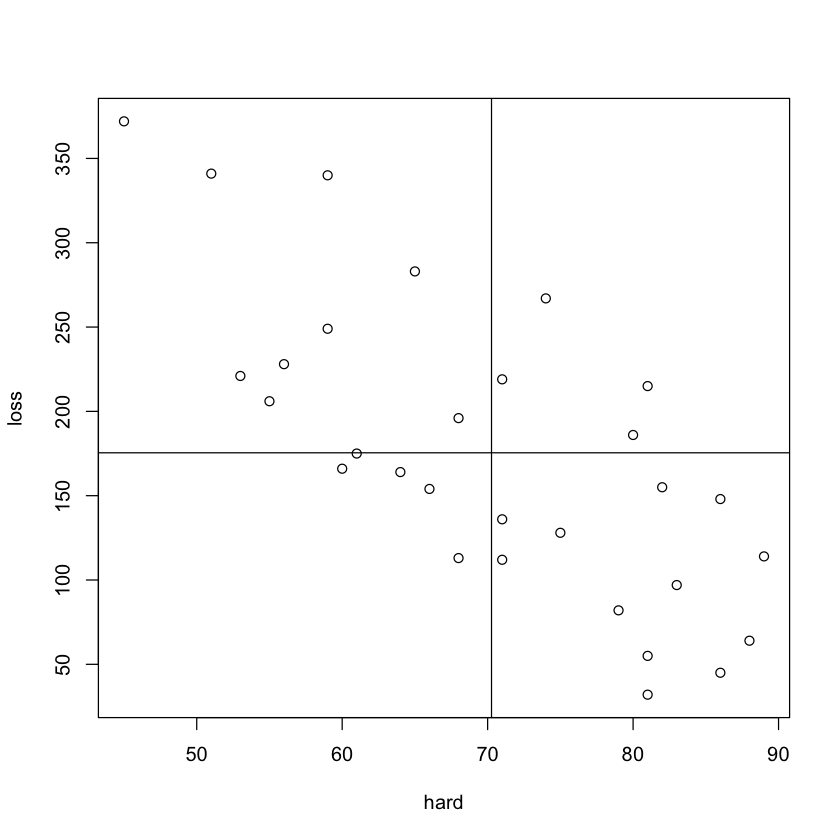

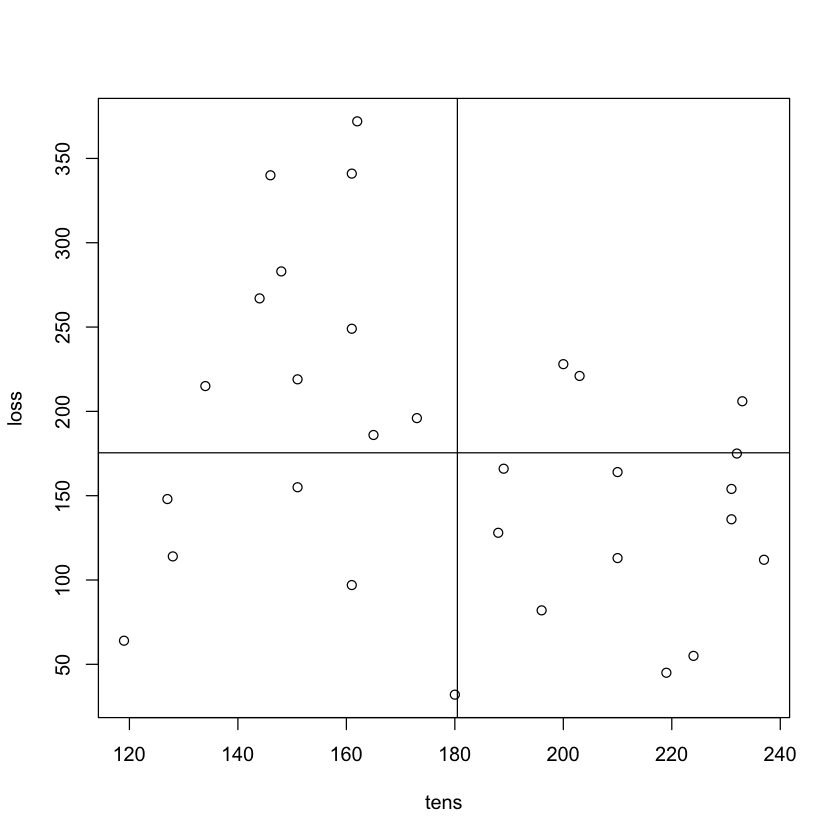

In [2]:
plot(loss~hard); abline(h=mean(loss), v=mean(hard))
plot(loss~tens); abline(h=mean(loss), v=mean(tens))

<hr style="border-top: 5px solid black;">

<div id="objective3" class="alert alert-block alert-warning" style="font-size:16px; border:1px solid black; padding:10px"><center><h1><br><font color="blue">Estimating and Interpreting Parameters.</font></h1></center><br>
</div>
<div style="font-size:16px; border:1px solid black; padding:10px">
    <ul><strong><u>The Basics:</u></strong>
<li>There are three model parameters that must be estimated in the linear model $$y=\beta_0+\beta_1x+\varepsilon_y=\beta_0+\beta_1x+\varepsilon$$ </li><br>
        <li>These include the $\beta_0$, $\beta_1$, and $\sigma^2$, the variance of the error term.</li><br>
        <li>The point estimates for $\beta_0$, $\beta_1$, as expressed by $\hat{\beta_0}$, $\hat{\beta_1s}$ will be used to form the regression line (which is essentially our prediction sequation)
        $$\hat\mu_{y|x}=\hat\beta_0+\hat\beta_1x$$</li><br>
        <li>$\hat\mu_{y|x}$ is point estimate for the population $\mu_{y|x}$ mean of the response y at a given value of x</li><br>
        <li>The most common way to calculate the point estimates $\hat\mu_{y|x}$ is through least-sqaures regression.</li><br>   
    </ul>
    <hr>
    <ul><strong><u>Formulas:</u></strong>
        <li>$n$ is the sample size and represents the number of (x, y) pairs.</li><br>
        <li>$\bar{x}$ is the sample mean of the independent (explanatory) variable.</li><br>
        <li>>$\bar{y}$ is the sample mean of the dependent (response) variable.</li><br>
        <li>$$SS_{xx}=\sum_{j=1}^n(x_j-\bar x)^2$$ is the sum square deviations in the independent variable.</li><br>
        <li>$$SS_{yy}=\sum_{j=1}^n(y_j-\bar y)^2$$ is the sum square deviations in the dependent variable.</li><br>
        <li>$$SS_{xy}=\sum_{j=1}^n(x_j-\bar x)(y_j-\bar y)$$ is the sum of the cross product of the independent and dependent variables.</li><br>
        <li>The sample variance $\sigma^2$ is calculated by: $$s_x^2=\frac{SS_{xx}}{n-1}$$</li><br>
        <li>The $\sigma^2$ = $s_x^2$ = $MSE$</li><br>        
        <li>The sample covariance (which measures the strength of the linear relationship between x and y is expressed as $$s_{xy}=\frac{SS_{xy}}{n-1}=\frac1{n-1}\sum_{j=1}^n(x_j-\bar x)(y_j-\bar y)$$.</li><br>
        <li>$s_{xy}$ can be positive or negative.</li><br>        
        <li>The horizontal deviation is expressed as $x_j-\bar x$ is.</li><br>        
        <li>The vertical deviation is expressed as $y_j-\bar y$ is</li><br>   
        <li>The $SS_{xy}$ is the sum of all the prodcuts of each of the deviations</li><br>        
        <li>The point estimate for the splope is calculated using this formula: $$\hat\beta_1=\frac{SS_{xy}}{SS_{xx}}$$</li><br>
        <li>$\beta_1$ represents the rate of change of the mean value of the response variable (y) with respect to the explanatory variable (x).</li><br>  
        <li>The point estimate for the intercept is calculated with: $$\hat\beta_0=\bar y-\hat\beta_1\bar x$$.</li><br> 
        <li>The intercept formula implies the regression line with always pass through the center of the data where $(\bar x, \bar y)$</li><br>        
        <li>The $\beta_0$ is generally not key in the interpretation as the linear model is primarily concerned with the range of values in x.</li><br>
        <li>The following section will demonstrate how to manually calcualte some of these metrics, and R code that does all the heavy lifting.</li><br>
    </ul>    
</div>

<hr style="border-top: 5px solid black;">

# Variables

In [3]:
x <- Rubber$hard; x
y <- Rubber$loss; y
n <- length(x); n

[1] 45 55 61 66 71 71 81 86 53 60 64 68 79 81 56 68 75 83 88 59 71 80 82 89 51
[26] 59 65 74 81 86

[1] 372 206 175 154 136 112  55  45 221 166 164 113  82  32 228 196 128  97  64
[20] 249 219 186 155 114 341 340 283 267 215 148

[1] 30

# Calculate $\bar x$ and $\bar y$

In [4]:
xbar <- sum(x)/n ; xbar
ybar <- sum(y)/n ; ybar

[1] 70.26667

[1] 175.4333

# Calculate $SS_xx$, $SS_yy$ and $SS_xy$

 - You can also use mean(x), mean(y) and var()
 - ss.xx = (n-1)*var(x)
 - ss.yy = (n-1)*var(y)
 - ss.xy = (n-1)*covar(x,y)

In [5]:
SS.xx <- sum( (x-xbar)^2 ); SS.xx
SS.yy <- sum( (y-ybar)^2 ); SS.yy
SS.xy <- sum( (x-xbar)*(y-ybar) ); SS.xy

[1] 4299.867

[1] 225011.4

[1] -22946.47

# Calculate the Slope $\hat{\beta_1} = \frac{SS_{xy}}{SS_{xx}}$

In [6]:
b1.hat <- SS.xy/SS.xx; b1.hat

[1] -5.336553

# Calculate the Intercept $\hat{\beta_0} = \bar y - \hat \beta_1 \bar x$

In [7]:
b0.hat <- ybar-b1.hat*xbar; b0.hat

[1] 550.4151

# Our regression line (prediction equation) 

 - $$\hat\mu_{y|x}=\hat\beta_0+\hat\beta_1x$$ <br>
 - $$\hat\mu_{y|x}=550.415 - 5.3366x$$

# Plot the prediction equation

 - Use the R code <code>abline(a=intercept, b=slope)</code> to help visualize the results

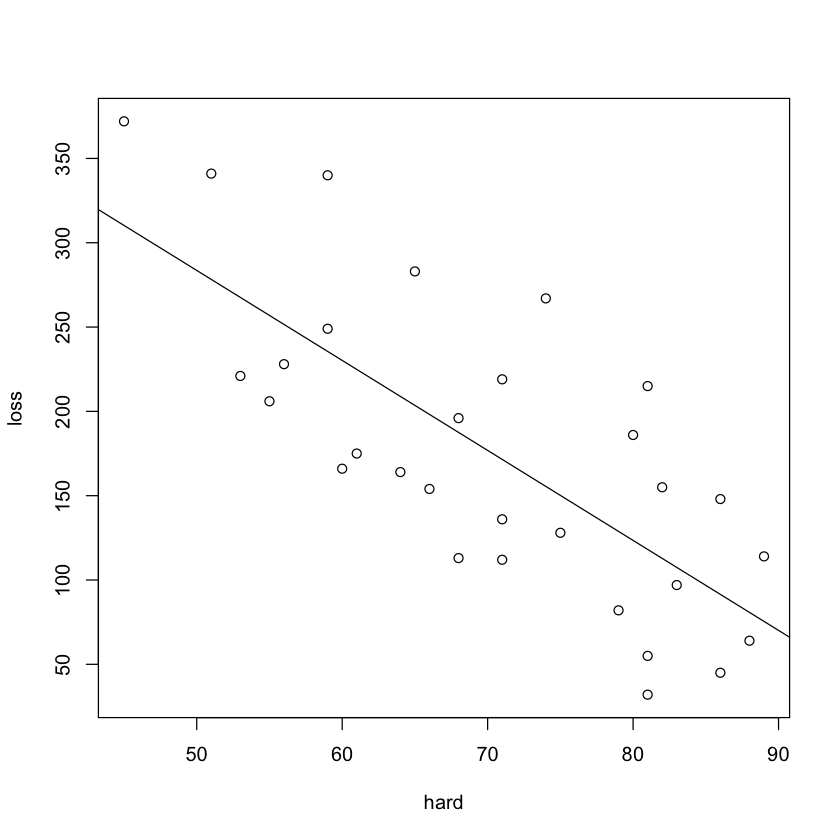

In [8]:
plot(loss~hard)
abline(a=b0.hat, b=b1.hat)

# R method to obtain the prediction equation

 - name.for.linear.model <-lm(response~independent)
 - coefficients( name.for.linear.model )

In [9]:
rubber.lm <- lm(loss~hard)
coefficients(rubber.lm)

(Intercept)        hard 
 550.415129   -5.336553

<hr style="border-top: 5px solid black;">